# SciPy - Processamento de Imagens

Scipy tem uma biblioteca com várias funções para processamento de imagens, incluindo funções para filtragens linear e não-linear, morfologia binária, interpolação e medição de objetos.

Podemos trabalhar facilmente com imagens em SciPy, tanto imagens coloridas como em tons de cinza.  As imagens são armazenadas em ndarrays.

In [40]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.ndimage as ndi
from pathlib import Path
#import skimage
import PIL

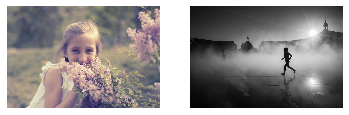

In [41]:
im1 = np.asarray(PIL.Image.open("girl.jpg"))
im2 = np.asarray(PIL.Image.open("high_contrast.jpg"))
plt.subplot(121)
fig = plt.imshow(im1)
fig.axes.set_axis_off()
plt.subplot(122)
fig = plt.imshow(im2, cmap="gray")
fig.axes.set_axis_off()

In [42]:
print("Dimensões da 1a imagem:", im1.shape)
print("Dimensões da 2a imagem:", im2.shape)

Dimensões da 1a imagem: (665, 1000, 3)
Dimensões da 2a imagem: (665, 998)


A imagem colorida é armazenada em ndarray com 3 dimensões, sendo a terceira de comprimento 3 ou 4, contendo cada subarray os valores para o vermelho, verde, azul e, opcionalmente, o canal de transparência.  Estas subarrays podem ser acessadas individualmente

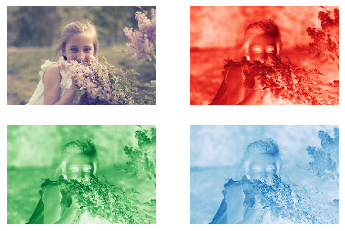

In [43]:
im = np.asarray(PIL.Image.open("girl.jpg"))
plt.subplot(221)
fig = plt.imshow(im)
fig.axes.set_axis_off()
plt.subplot(222)
fig = plt.imshow(im[:, :, 0], cmap="Reds")
fig.axes.set_axis_off()
plt.subplot(223)
fig = plt.imshow(im[:, :, 1], cmap="Greens")
fig.axes.set_axis_off()
plt.subplot(224)
fig = plt.imshow(im[:, :, 2], cmap="Blues")
fig.axes.set_axis_off()

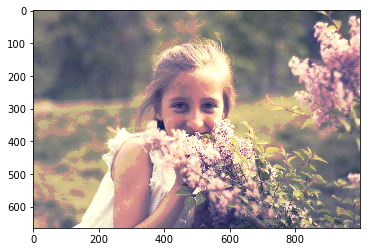

In [44]:
im2 = im.copy()
im2 = im2.astype(np.float64)
im2[im2 > 150] *= 1.2
im2[im2 > 255] = 255
im2 = im2.astype(np.uint8)
plt.imshow(im2)

Uma imagem colorida pode ser lida automaticamente em tons de cinza através do parâmetro `flatten` da função `imread`.

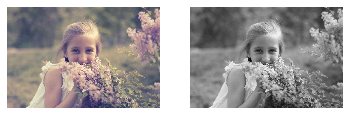

In [50]:
im1 = np.asarray(PIL.Image.open("girl.jpg"))
im2 = np.asarray(PIL.Image.open("girl.jpg").convert("L"))
plt.subplot(121)
fig = plt.imshow(im1)
fig.axes.set_axis_off()
plt.subplot(122)
fig = plt.imshow(im2, cmap="gray")
fig.axes.set_axis_off()

Toda imagem tem os valores de seus pixels distribuídos por uma faixa de valores.  Podemos construir um histograma desses valores para termos uma ideia de como a imagem parece.

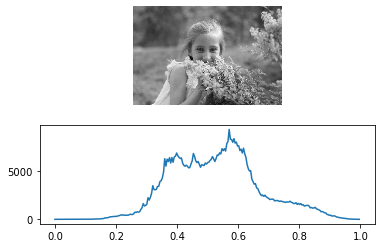

In [54]:
plt.subplot(211)
fig = plt.imshow(im2, cmap="gray")
fig.axes.set_axis_off()
plt.subplot(212)
_ = plt.plot(np.arange(256)/256, ndi.histogram(im2, min=0, max=255, bins=256))

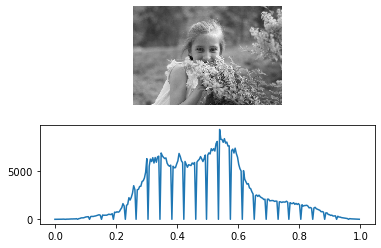

In [59]:
im4 = im2.copy()
im4 = (im4 - im4.min())*(255/(im4.max() - im4.min())) #"aumentar os detalhes"
plt.subplot(211)
fig = plt.imshow(im4, cmap="gray")
fig.axes.set_axis_off()
plt.subplot(212)
_ = plt.plot(np.arange(256)/256, ndi.histogram(im4, min=0, max=255, bins=256))

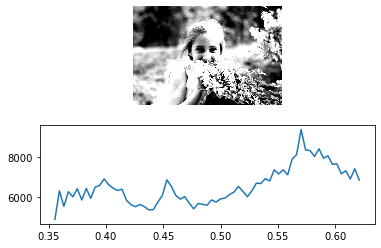

In [60]:
im3 = im2.copy()
im3[im2[:,:] < 90] = 90
im3[im2[:,:] > 160] = 160
plt.subplot(211)
fig = plt.imshow(im3, cmap="gray")
fig.axes.set_axis_off()
plt.subplot(212)
l = 159-91+1
_ = plt.plot((91 + np.arange(l))/256, ndi.histogram(im3, min=91, max=159, bins=l))